Statistical analysis conducted to see, if fowards do score more goals that other players in football. <br>
Data scraped from fbref

In [44]:
# Importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv(r'C:\Users\igors\Desktop\Data Science\2020-2021 player stats.csv', index_col=0)
players = df['1_Player']
df = df[players != 'Player']
df['Performance_Gls'] = df['Performance_Gls'].astype('int64')
df['Performance_Gls'] = df.groupby('1_Player')['Performance_Gls'].transform('sum')
df = df.drop_duplicates(subset='1_Player')


In [46]:
df

,1_Player,3_Pos,Performance_Gls
0,Patrick van Aanholt,DF,0
1,Tammy Abraham,FW,6
2,Che Adams,FW,9
3,Tosin Adarabioyo,DF,0
4,Adrián,GK,0
...,...,...,...
598,Yoel,GK,0
600,Joseba Zaldúa,DF,0
601,Oier Zarraga,MF,0
602,Igor Zubeldia,DF,1


In [47]:
df['3_Pos'].unique()

array(['DF', 'FW', 'GK', 'FW,MF', 'DF,FW', 'MF', 'MF,FW', 'MF,DF',
       'DF,MF', 'FW,DF', 'GK,MF'], dtype=object)

In [48]:
df = df[df['3_Pos'] != 'GK']
df = df[df['3_Pos'] != 'GK,MF']
fw_cols = ['FW','FW,MF']
rest_cols = ['DF','MF','MF,FW','DF,MF','MF,DF','FW,DF']
forwards = df.loc[df['3_Pos'].isin(fw_cols)]
rest = df.loc[df['3_Pos'].isin(rest_cols)]

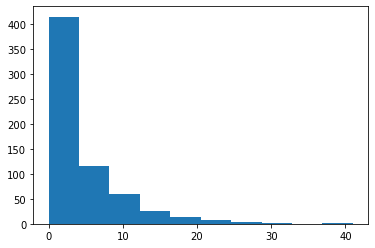

In [52]:
plt.hist(x=forwards['Performance_Gls'])
plt.show()

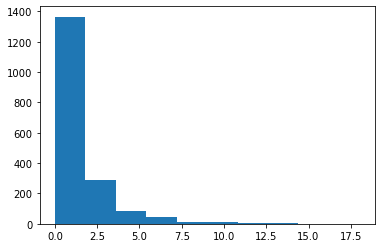

In [53]:
plt.hist(x=rest['Performance_Gls'])
plt.show()

In [56]:
#Goals are not normally distrbuted, so I'll use Mann-Whitney U test
from scipy.stats import mannwhitneyu
mw_u, p = mannwhitneyu(forwards['Performance_Gls'], rest['Performance_Gls'])
print(f'Man-Whitney test statistic: {mw_u}')
print(f'p_value: {p}')

Man-Whitney test statistic: 333495.0
p_value: 1.3179308431448974e-65


P value from Mann-Whitney test is almost 0, which means that the null hypothesis stating that means are equal is rejected. <br>
At 5 % signifficance, forwards do score more goals than players in other positions.